In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [1]:
import sys
print(sys.version)
print(sys.executable)

3.9.23 (main, Jun  5 2025, 08:23:30) 
[Clang 14.0.6 ]
/opt/anaconda3/envs/tensorflow/bin/python


In [9]:
import keras   #cpu tensorflow
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

3.6.0
2.18.1


In [10]:
import statsmodels

#### 泊松回归

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1.生成模拟数据
np.random.seed(42)
# 是用来设置随机数生成器的种子（seed）。在使用随机数生成器时，种子是一个整数值，用于初始化随机数生成器的状态。
# 设置种子的主要目的是确保代码在每次运行时生成相同的随机数序列，这对于实验的可重复性和结果的验证非常重要。
n = 100 # 样本量

# 自变量
X1 = np.random.normal(loc = 5,scale = 2,size = n) # 是 NumPy 库中的一个函数调用，用于生成符合正态分布（也称为高斯分布）的随机数。
X2 = np.random.normal(loc = 10,scale = 3,size = n)
# loc(float)：正态分布的均值，对应着这个分布的中心。在 np.random.normal(loc = 5,scale = 2,size = n) 中，loc = 5 表示生成的随机数的平均值为 5，即分布以 5 为中心。
# scale(float)：正态分布的标准差，对应分布的宽度。scale = 2 说明生成的随机数的标准差为 2。标准差越大，正态分布的曲线越矮胖，意味着数据越分散；标准差越小，曲线越高瘦，数据越集中在均值附近。
# size(int 或者整数元组)：输出的值赋在 size 里，默认为 None。size = n 表示生成 n 个符合该正态分布的随机数。如果 n 是一个整数，则生成一个包含 n 个元素的一维数组；如果 n 是一个整数元组，例如 (a, b)，则生成一个形状为 (a, b) 的二维数组。

# 生成泊松分布的事件发生次数作为响应变量
lambda_ = np.exp(0.5 * X1 + 0.3 * X2) 
# 0.5 和 0.3 是回归系数。在泊松回归的情境下，泊松回归模型假设响应变量 Y 服从泊松分布，其均值 λ 与自变量之间存在对数线性关系
Y = np.random.poisson(lam = lambda_)

# 创建dataframe
data = pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'Y':Y
})

# 2.构建泊松回归模型
# 使用公式接口构建模型
# 表示Y作为响应变量,X1和X2作为预测变量
model = smf.poisson('Y ~ X1+X2',data = data)
# 表达式 y ~ x1 + x2 是统计学中一种常见的公式表示法，常用于线性回归等模型的描述。
# 在这种表示中，y 是因变量（也称为响应变量），代表需要被预测或解释的变量；x1 和 x2 是自变量（也称为解释变量），用于预测或解释因变量 y 的变化。
# ~ 符号表示“由……决定”或“依赖于”，加号 + 表示将多个自变量组合在一起，意味着 y 的值由 x1 和 x2 共同决定。
results = model.fit()

# 3.输出模型结果
print(results.summary())

# 4.进行预测
predictions = results.predict(data)
print(predictions.head())

Optimization terminated successfully.
         Current function value: 4.215294
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:                      Y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Oct 2025   Pseudo R-squ.:                  0.9883
Time:                        16:04:39   Log-Likelihood:                -421.53
converged:                       True   LL-Null:                       -35958.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0516      0.027     -1.929      0.054      -0.104       0.001
X1             0.5045      0.

#### 神经网络

In [4]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

2025-10-11 16:09:50.422901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# 创建示例数据(使用实际数据替换)
X_train = np.random.rand(100,10)  # 100个样本，每个样本有10个特征
y_train = np.random.rand(100)
X_test = np.random.rand(20,10)
y_test = np.random.rand(20)

# 定义神经网络模型
# 使用 Sequential 构建包含两个 Dense 层（第一层 5 个神经元线性激活，输入形状为 X_train 特征数，第二层 1 个神经元线性激活）的神经网络模型
model = Sequential([ 
    Dense(5,activation = 'linear',input_shape = (X_train.shape[1],)), # 5个神经元，线性激活
    Dense(1,activation = 'linear') # 输出层
])
# Sequential 模型：Sequential 是 Keras 中用于构建简单线性堆叠模型的类，即网络层按顺序依次堆叠，前一层的输出作为后一层的输入。
# Dense 层：全连接层，每个神经元与前一层的所有神经元都有连接。
# 第一层 Dense 层：有 5 个神经元，使用线性激活函数 linear，输入形状为 X_train 的特征数，意味着将输入数据映射到 5 维的特征空间。
# 第二层 Dense 层：有 1 个神经元，同样使用线性激活函数，将 5 维的特征空间映射到 1 维的输出空间，通常用于回归问题。

# 编译模型
model.compile(optimizer = Adam(learning_rate = 0.01),loss ='mean_squared_error')
# optimizer 参数指定了优化器，这里使用 Adam 优化器，学习率设置为 0.01。

# 训练模型
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,  # 20% 的数据用于验证
                    verbose=1)
# epochs=50：指定模型迭代的次数。每一次迭代意味着模型会遍历整个训练数据集一次。通常情况下，迭代次数越多，模型学习得越充分，但过多的迭代可能会导致过拟合，即模型在训练数据上表现很好，但在新数据上表现不佳1。
# batch_size=10：每次迭代中使用的样本数量。在训练过程中，模型不会一次性处理整个训练数据集，而是将其分成多个小批次进行处理。batch_size设置为10表示每次迭代模型会使用10个样本进行参数更新。较大的batch_size可以使训练更加稳定，但会占用更多的内存1。
# validation_split=0.2：表示将训练数据集的20%作为验证集。在每次训练迭代结束后，模型会在验证集上进行评估，以监控模型在未见过的数据上的性能。这有助于检测模型是否过拟合，以及调整模型的超参数1。
# verbose=1：控制训练过程的信息显示模式。verbose=1表示在训练过程中会显示详细的训练进度条，包括每个epoch的训练损失、验证损失等信息。

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/50


/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2337 - val_loss: 0.2356
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1960 - val_loss: 0.1978
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1197 - val_loss: 0.1542
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1079 - val_loss: 0.1403
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1118 - val_loss: 0.1391
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0850 - val_loss: 0.1264
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0758 - val_loss: 0.1259
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0908 - val_loss: 0.1217
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0837 - val_loss: 0.1183
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0791 - val_loss: 0.1143
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0844 - val_loss: 0.1218
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0804 - val_loss: 0.1103
Epoch 13/50
8/8 ━━━━━━

#### 卷积神经网络 - 应用

In [2]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# 加载 MNIST 数据集
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


原理
在图像数据处理中，图像通常由像素值组成，每个像素值表示该位置的颜色强度。在常见的图像表示中，像素值的范围通常是 0 到 255，其中 0 表示黑色，255 表示白色。这种归一化方法的原理是将每个像素值除以 255，将像素值的范围从 [0, 255] 缩放到 [0, 1]。

作用
加速模型收敛：在机器学习和深度学习中，模型通常使用梯度下降等优化算法来更新参数。当输入数据的范围较大时，梯度的计算可能会变得不稳定，导致模型收敛速度较慢。通过将数据归一化到 [0, 1] 范围，可以使梯度计算更加稳定，从而加速模型的收敛速度。
提高模型的稳定性：不同特征的取值范围可能差异很大，如果不进行归一化，模型可能会对取值范围较大的特征更加敏感，从而影响模型的稳定性和泛化能力。归一化后，所有特征的取值范围相同，模型可以更加公平地对待每个特征。
避免数值问题：在计算过程中，较大的数值可能会导致数值溢出或下溢等问题。将数据归一化到较小的范围可以减少这些数值问题的发生。

In [4]:
# 归一化数据
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# 构建模型
model = models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    # Flatten(input_shape=(28,28)) 层的作用是将输入数据进行扁平化处理。
    # 在输入为二维数据（如 28x28 的图像）时，Flatten 层会将其转换为一维向量。
    # 例如，一个 28x28 的图像经过 Flatten 层后，会变成一个长度为 28 * 28 = 784 的一维向量。这是因为后续的全连接层（Dense 层）通常要求输入为一维数据
    layers.Dense(128,activation = 'relu'),
    # Dense(128, activation='relu')：这是一个全连接层，包含 128 个神经元。
    # 全连接层的每个神经元都与前一层的所有神经元相连。activation='relu' 表示使用 ReLU（Rectified Linear Unit）激活函数。
    # 它可以引入非线性因素，使得神经网络能够学习到更复杂的模式。
    layers.Dropout(0.2),
    # Dropout(0.2) 层的作用是在训练过程中随机忽略（丢弃）20% 的神经元。这是一种正则化技术，可以防止模型过拟合。
    # 过拟合是指模型在训练数据上表现很好，但在测试数据上表现较差的现象。通过随机丢弃神经元，模型可以学习到更鲁棒的特征，减少对某些特定神经元的依赖
    layers.Dense(10,activation = 'softmax')
    # 这也是一个全连接层，包含 10 个神经元。activation='softmax' 表示使用 Softmax 激活函数。
    # Softmax 函数常用于多分类问题，它将每个神经元的输出转换为概率值，所有神经元的概率值之和为 1。这使得模型的输出可以表示为每个类别的概率分布
])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8600 - loss: 0.4816
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9577 - loss: 0.1464
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9680 - loss: 0.1061
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9732 - loss: 0.0869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0736
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9760 - loss: 0.0807

Test accuracy: 0.9785000085830688
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


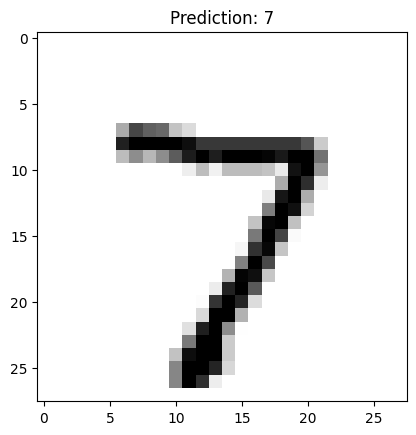

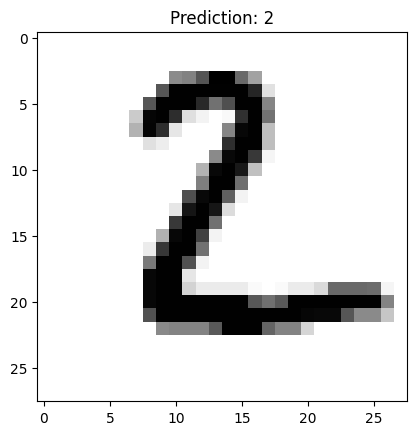

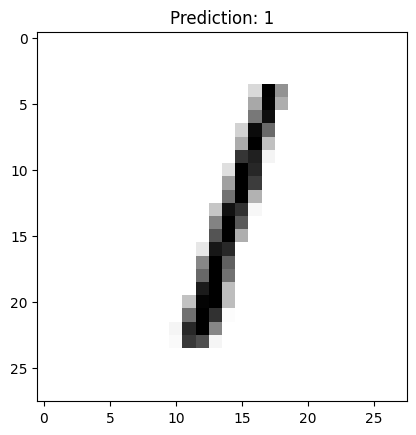

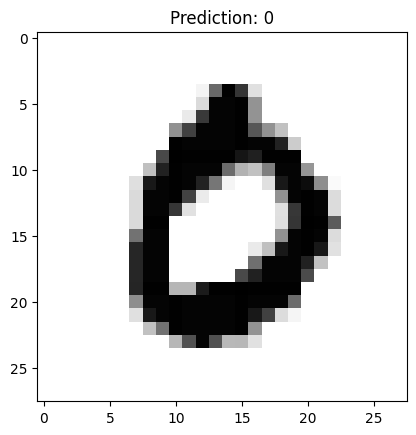

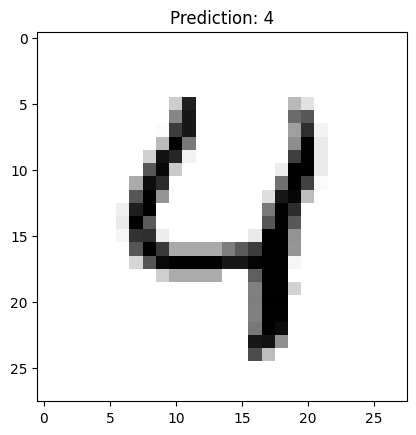

In [7]:
# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, epochs=5)

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'\nTest accuracy: {test_acc}')

# 可视化测试集中的前5个图像及其预测结果
predictions = model.predict(x_test)

for i in range(5):
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Prediction: {predictions[i].argmax()}")
    plt.show()

#### CNN

In [8]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 归一化数据
x_train = x_train / 255.0
x_test = x_test / 255.0

# 增加一个通道维度（因为MNIST是灰度图像，所以只有一个通道）
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# 构建CNN模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 卷积层1
    layers.MaxPooling2D((2, 2)),                                            # 池化层1
    layers.Conv2D(64, (3, 3), activation='relu'),                          # 卷积层2
    layers.MaxPooling2D((2, 2)),                                            # 池化层2
    layers.Conv2D(64, (3, 3), activation='relu'),                          # 卷积层3
    layers.Flatten(),                                                      # 展平层
    layers.Dense(64, activation='relu'),                                   # 全连接层1
    layers.Dense(10, activation='softmax')                                 # 输出层
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, epochs=5)

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5


/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8877 - loss: 0.3683
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9838 - loss: 0.0524
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9889 - loss: 0.0340
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9919 - loss: 0.0247
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9939 - loss: 0.0191
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9856 - loss: 0.0437
Test accuracy: 0.9900000095367432


#### 支持向量机

In [7]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 创建示例数据（使用实际数据替换）
X_train = np.random.rand(100, 10)  # 100个样本，每个样本有10个特征
y_train = np.random.rand(100)
X_test = np.random.rand(20, 10)
y_test = np.random.rand(20)

# 定义支持向量机回归模型
svm_model = make_pipeline(
    StandardScaler(),
    SVR(kernel = 'linear',C = 1.0)
)
# make_pipeline：它是一个便捷函数，用于快速创建 Pipeline 对象。Pipeline 是一个将多个数据处理步骤和机器学习模型组合在一起的工具，按顺序执行每个步骤。在这个例子中，make_pipeline 会依次执行 StandardScaler 的数据标准化操作，然后使用 SVR 进行回归分析。
# StandardScaler：用于对数据进行标准化处理。标准化可以使数据的均值为 0，标准差为 1，有助于提高模型的训练效果和收敛速度。许多机器学习算法在标准化的数据上表现更好，特别是那些基于距离计算的算法，如 SVM。
# SVR(kernel='linear', C = 1.0)：SVR 是支持向量回归模型，用于解决回归问题。kernel='linear' 表示使用线性核函数，意味着模型假设数据在特征空间中是线性可分的。C = 1.0 是正则化参数，控制模型的复杂度。较小的 C 值会使模型更注重全局特征，减少过拟合的风险；较大的 C 值会使模型更注重局部特征，可能导致过拟合。

# 训练模型
svm_model.fit(X_train,y_train)

# 预测
y_pred = svm_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.12353670491328335


因为X有10个特征,y没有设置,所以在数值上无法一一对应,无法可视化

#### XGB-Poisson (XP)

Mean Squared Error: 845926.7500


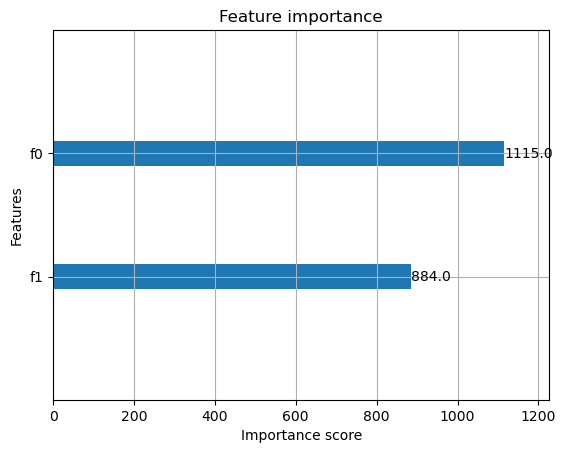

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 生成模拟数据
np.random.seed(0)
n = 1000  # 样本量

# 自变量
# loc、scale 和 size 是用于生成正态分布（高斯分布）随机数的参数。
X1 = np.random.normal(loc = 5,scale = 2,size = n)
X2 = np.random.normal(loc = 10, scale = 3, size = n)

# 生成泊松分布的事件发生次数作为响应变量
lambda_ = np.exp(0.5 * X1 + 0.3 * X2)
Y = np.random.poisson(lam = lambda_)

# 创建dataframe
data = pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'Y':Y
})

# 2.数据准备
X = data[['X1','X2']]
y = data['Y']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3.构建DMatrix对象
dtrain = xgb.DMatrix(X_train.values,label = y_train.values)
dtest = xgb.DMatrix(X_test.values,label = y_test.values)

# 4.设置参数
# 4. 设置参数
params = {
    'objective': 'count:poisson',  # 使用泊松回归
    'eval_metric': 'poisson-nloglik',  # 使用泊松对数似然作为评估指标
    'eta': 0.1,  # 学习率
    'max_depth': 6,  # 树的最大深度
    'alpha': 0.1,  # L1 正则化项
    'base_score': 0.5  # 确保 base_score 是一个合理的数值
}

# 5.训练模型
num_round = 100 # 迭代次数
model = xgb.train(params,dtrain,num_round)

# 6.进行预测
y_pred = model.predict(dtest)

# 7.评估模型
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# 8. 打印特征重要性
xgb.plot_importance(model)
plt.show()